In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd

In [31]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [33]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [35]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [39]:
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 24) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-24


In [40]:

# Perform a query to retrieve the data and precipitation scores

year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23'  ).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

dateStart = '2016-08-23'
dateEnd = '2017-08-23'
dated_precipitation = pd.DataFrame (year_prcp, columns=['date', 'precipitation'])
dated_precipitation.set_index('date', inplace=True)
dated_precipitation.sort_index()
dated_precipitation.dropna()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


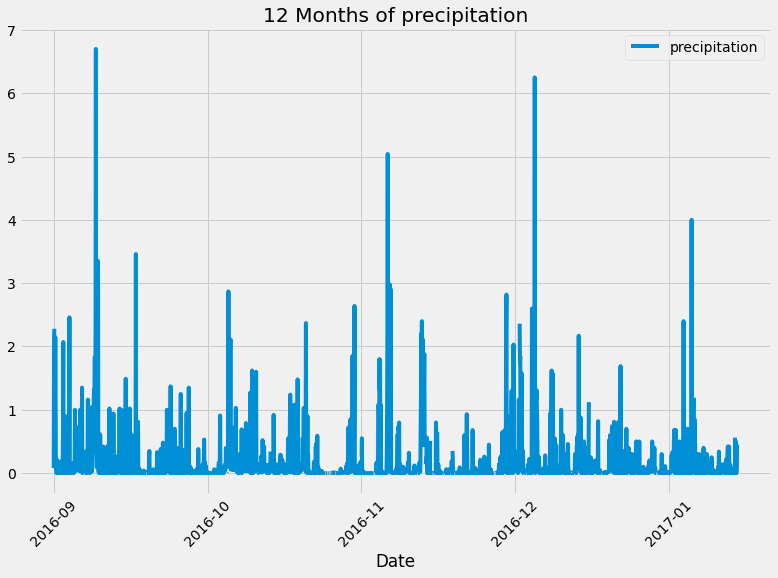

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = dated_precipitation.plot(figsize=(12,8))
plt.legend()
plt.title("12 Months of precipitation")
xTickLabel = np.arange(np.datetime64(dateStart), np.datetime64(dateEnd), np.timedelta64(1, 'M'), dtype='datetime64[M]')
ax.set_xticklabels(xTickLabel,rotation=45)
ax.set_xlabel('Date')
plt.show()

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dated_precipitation.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [43]:
# Design a query to show how many stations are available in this dataset?
numstations = session.query(Station.id).count()
print('There are %i stations in this dataset'%numstations)

There are 9 stations in this dataset


In [44]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [47]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station=session.query(Measurement.tobs).\
      filter(Measurement.station== 'USC00519281').\
      filter(Measurement.date >= query_date).all()
station

station_df = pd.DataFrame(station, columns=['Tempature'])
station_df.head()

,Tempature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
